In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from plot_settings_homework import *

# Path to the data
PATH = "../benchmarks/io_operations/data/"


data = pd.DataFrame(columns=["size","cores","method","time", "type"])

for file in os.listdir(PATH):

    # Get the file name
    size = 80 # gb
    cores = file.split("_")[2].split("-")[1].split(".")[0]
    method = file.split("_")[1]
    reader = file.split("_")[0]

    print("Loading data from file: {}".format(file))
    np_data = np.loadtxt(PATH+file)
    if np_data.ndim == 0:
        np_data = np.array([np_data,])
    print(np_data.shape)
    pd_data = pd.DataFrame(np_data,columns=["time"])
    pd_data["size"] = size
    pd_data["cores"] = cores
    pd_data["method"] = method
    pd_data["type"] = reader

    data = pd.concat([data,pd_data],ignore_index=True)

# Set index
data["cores"] = data["cores"].astype(int)
data = data.set_index(["size","cores","method","type"])

Loading data from file: writer_cpp_parallel-96.txt
(2,)
Loading data from file: writer_cpp_parallel-32.txt
(3,)
Loading data from file: times_cpp_parallel-96.txt
(6,)
Loading data from file: times_cpp_parallel-128.txt
(6,)
Loading data from file: writer_cpp_parallel-288.txt
(2,)
Loading data from file: times_cpp_parallel-32.txt
(3,)
Loading data from file: writer_cpp_parallel-64.txt
(2,)
Loading data from file: times_cpp_parallel-64.txt
(4,)
Loading data from file: writer_dask_parallel-224.txt
(2,)
Loading data from file: reader_cpp_parallel-256.txt
(2,)
Loading data from file: reader_dask_parallel-256.txt
(2,)
Loading data from file: reader_dask_parallel-224.txt
(2,)
Loading data from file: writer_dask_parallel-256.txt
(2,)
Loading data from file: reader_cpp_parallel-224.txt
(2,)
Loading data from file: writer_cpp_parallel-224.txt
(2,)
Loading data from file: writer_cpp_parallel-256.txt
(2,)
Loading data from file: times_dask_parallel-32.txt
(5,)
Loading data from file: times_dask_par

/tmp/ipykernel_339773/511868156.py:23: UserWarning: loadtxt: input contained no data: "../benchmarks/io_operations/data/writer_dask_parallel-288.txt"
  np_data = np.loadtxt(PATH+file)
/tmp/ipykernel_339773/511868156.py:23: UserWarning: loadtxt: input contained no data: "../benchmarks/io_operations/data/writer_dask_parallel-320.txt"
  np_data = np.loadtxt(PATH+file)


<AxesSubplot: xlabel='cores'>

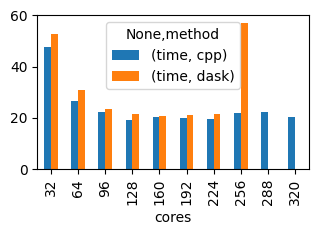

In [38]:
data.loc[80,:,:,"writer"].groupby(["cores","method"]).mean().unstack().plot(kind="bar",ax=plt.gca())

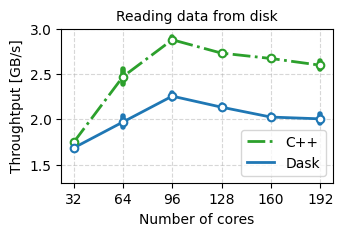

In [97]:

fig, ax = plt.subplots(1,1)

cmap = plt.get_cmap("tab10")

# Set Some plot settings
labels = {"dask":"Dask", "numpy":"Numpy (threaded)", "cpp":"C++"}
styles = {"dask":"-", "numpy":"--", "cpp":"-."}
colors = {"dask":cmap(0), "numpy":cmap(1), "cpp":cmap(2)}
offset = {"dask":0, "numpy":0, "cpp":0}

df_scaling = 80 / data.loc[80,:,:,"reader"].groupby(["method","cores"]).quantile([0.05,0.5,0.95]) 

ax.grid(True, which="both", axis="both", ls="--", alpha=0.5)
for method in df_scaling.index.get_level_values(0).unique():
    color = colors[method]
    label = labels[method]

    temp = df_scaling.loc[method,:,0.5].loc[32:192]
    lower = df_scaling.loc[method,:,0.05].loc[32:192]
    upper = df_scaling.loc[method,:,0.95].loc[32:192]
    x = temp.index + offset[method]
    lines = ax.vlines(
        x= x,
        ymin=lower,
        ymax=upper,
        color=colors[method],
        ls="-",
        lw=4,
    )
    lines.set_capstyle("round")

    # Plot with error bars
    #ax.errorbar(x, ci50, yerr=[ci50-ci25, ci75-ci50], color=color, label=labels[method], zorder=10 , linewidth=2, ls=styles[method])
    ax.plot(
        x, 
        temp, 
        color=color, 
        label=label, 
        linewidth=2,
        ls=styles[method],
    ) 

    ax.scatter(
        x,
        temp,
        marker="o",
        c="white",
        s=30,
        edgecolors=color,
        linewidth=1.5,
        zorder=5
    )




#ax.set_ylim(1, 100)
ax.set_xlabel("Number of cores")
ax.set_ylabel("Throughtput [GB/s]")


ax.legend()


ax.set_xticks([32,64,96,128,160,192,224,256,288,320])
ax.set_yticks([1.5,2,2.5,3])
ax.set_ylim(1.3,3)
ax.set_xlim(24,200)

ax.set_title("Reading data from disk")


save_kwargs = {"bbox_inches":"tight", "dpi":300, "transparent":True}
fig.savefig("../figures/io_reading.png", **save_kwargs)

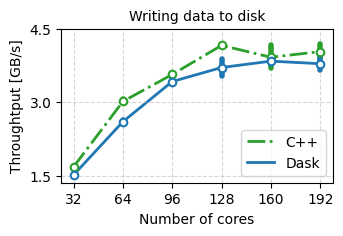

In [99]:

fig, ax = plt.subplots(1,1)

cmap = plt.get_cmap("tab10")

# Set Some plot settings
labels = {"dask":"Dask", "numpy":"Numpy (threaded)", "cpp":"C++"}
styles = {"dask":"-", "numpy":"--", "cpp":"-."}
colors = {"dask":cmap(0), "numpy":cmap(1), "cpp":cmap(2)}
offset = {"dask":0, "numpy":0, "cpp":0}

df_scaling = 80 / data.loc[80,:,:,"writer"].groupby(["method","cores"]).quantile([0.05,0.5,0.95]) 


# Set grid
ax.grid(True, which="both", ls="--", alpha=0.5)

for method in df_scaling.index.get_level_values(0).unique():
    color = colors[method]
    label = labels[method]

    temp = df_scaling.loc[method,:,0.5].loc[32:192]

    lower = df_scaling.loc[method,:,0.05].loc[32:192]
    upper = df_scaling.loc[method,:,0.95].loc[32:192]
    x = temp.index + offset[method]
    lines = ax.vlines(
        x= x,
        ymin=lower,
        ymax=upper,
        color=colors[method],
        ls="-",
        lw=4,
    )
    lines.set_capstyle("round")

    # Plot with error bars
    #ax.errorbar(x, ci50, yerr=[ci50-ci25, ci75-ci50], color=color, label=labels[method], zorder=10 , linewidth=2, ls=styles[method])

    ax.scatter(
        x,
        temp,
        marker="o",
        c="white",
        s=30,
        edgecolors=color,
        linewidth=1.5,
        zorder=5
    )

    ax.plot(
        x, 
        temp, 
        color=color, 
        label=label, 
        linewidth=2,
        ls=styles[method],
        zorder=0
    ) 





#ax.set_ylim(1, 100)
ax.set_xlabel("Number of cores")
ax.set_ylabel("Throughtput [GB/s]")


ax.legend(loc="lower right")


ax.set_xticks([32,64,96,128,160,192,224])
ax.set_yticks([1.5,3, 4.5,])
#ax.set_ylim(1.5,3)
ax.set_xlim(24,200)

ax.set_title("Writing data to disk")


save_kwargs = {"bbox_inches":"tight", "dpi":300, "transparent":True}
fig.savefig("../figures/io_writing.png", **save_kwargs)